In [1]:
%load_ext autoreload
%autoreload 2

# Running Eigenmode Simulations & EPR Analysis with `QHFSSEigenmodePyaedt`

This notebook is a tutorial on how to use `QHFSSEigenmodePyaedt` class.

First, what is an eigenmode solver? "The eigenmode solver is used to calculate the frequencies and the corresponding electromagnetic field patterns (eigenmodes), when no excitation is applied." From [MIT - Eigenmode Solver Overview](https://space.mit.edu/RADIO/CST_online/mergedProjects/3D/special_overview/special_overview_eigenmodesolverover.htm).

This all fine, but our circuit contains quantum effects and ANSYS use a purely classical electromagnetic solver. How can we predict qubit anharmonicity and dispersive shift? Well, we can use [Energy Participation Ratio (EPR) analysis](https://www.nature.com/articles/s41534-021-00461-8) to quantize the circuit. Luckily for us, Qiskit Metal has integration w/ `pyEPR`, allowing for easy implementation of EPR analysis.

# Overview of Tutorial
1. [Simulation of single transmon qubit](#qubit_only)
2. [Simulation of transmon coupled to cavity](#qubit_cavity)
3. [Simulation of two transmon coupled to each other](#qubit_qubit)

Let's begin by importing everything we'll need

In [2]:
from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross

from qiskit_metal.renderers.renderer_ansys_pyaedt.hfss_renderer_eigenmode_aedt import QHFSSEigenmodePyaedt
import pyEPR as epr

from qiskit_metal.designs.design_multiplanar import MultiPlanar

import numpy as np
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs

# Use Multiplanar design, for Ansys HFSS Eigenmode simulation using pyaedt renderer

**DISCLAIMER:** For now, this might only work with the full version (paid) of Ansys and not the student version. This issue is fixable and requires more testing. Please run the notebook and test it out on student license, if you're interested to make a contribution!

In [3]:
design = MultiPlanar(metadata={},
                     overwrite_enabled=True)

# Check if layer data is useable, if so launch GUI
ls_unique = design.ls.is_layer_data_unique()
if (ls_unique != True):
    raise ValueError('Layer data in `MultiPlanar` design is not unique')

gui = MetalGUI(design)

10:12PM 01s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  WARNING: Could not create pixmap from c:\usershris\qiskit-metal\qiskit_metal\_gui\styles\metal_dark\rc\transparent.png

10:12PM 01s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  WARNING: Could not create pixmap from c:\usershris\qiskit-metal\qiskit_metal\_gui\styles\metal_dark\rc\transparent.png



# 1. Transmon Qubit ONLY <a id='qubit_only'></a>

## Create Design
In section 1, we're concered with simulating a single Transmon. Hence, the design is simple.

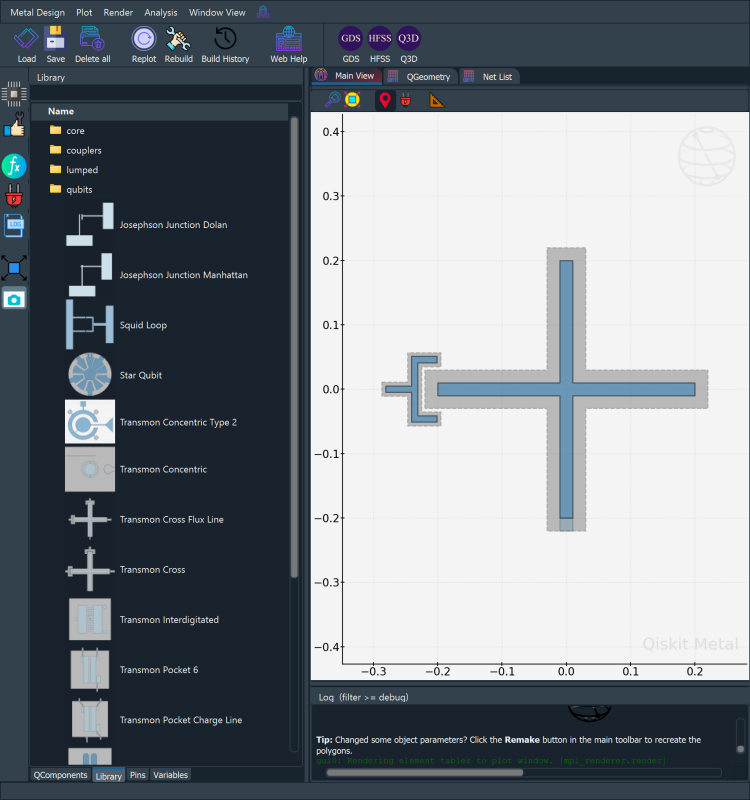

In [4]:
xmon_options = dict(
    connection_pads=dict(readout = dict()),
)

TransmonCross(design, 'transmon', options=xmon_options)

gui.rebuild()
gui.zoom_on_components(['transmon'])
gui.screenshot()

## Launch Eigenmode Analysis
Uses `pyAEDT` to connect to ANSYS. Note (as of May 2023) there's only support for the paid-version of ANSYS .

In [5]:
em1_aedt = QHFSSEigenmodePyaedt(design, 
                                'Eigenmode_Tutorial',
                                'Qubit ONLY',
                                initiate=True)

# Path to access Hfss pyAEDT object
hfss_aedt = em1_aedt.current_app

pyaedt INFO: using existing logger.


INFO:Global:using existing logger.


pyaedt INFO: AEDT installation Path C:\Program Files\AnsysEM\Ansys Student\v222\Win64


INFO:Global:AEDT installation Path C:\Program Files\AnsysEM\Ansys Student\v222\Win64


pyaedt INFO: Launching AEDT with the gRPC plugin.


INFO:Global:Launching AEDT with the gRPC plugin.


pyaedt INFO: New AEDT session is starting on gRPC port 58750


INFO:Global:New AEDT session is starting on gRPC port 58750


pyaedt INFO: Ansoft.ElectronicsDesktop.2022.2SV  version started with process ID 17992.


INFO:Global:Ansoft.ElectronicsDesktop.2022.2SV  version started with process ID 17992.


pyaedt INFO: pyaedt v0.6.46


INFO:Global:pyaedt v0.6.46


pyaedt INFO: Python version 3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 17:59:51) [MSC v.1935 64 bit (AMD64)]


INFO:Global:Python version 3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 17:59:51) [MSC v.1935 64 bit (AMD64)]


pyaedt INFO: Project Eigenmode_Tutorial has been created.


INFO:Global:Project Eigenmode_Tutorial has been created.


pyaedt INFO: Added design 'Qubit ONLY' of type HFSS.


INFO:Global:Added design 'Qubit ONLY' of type HFSS.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt INFO: aedt file load time 0.03289008140563965


INFO:Global:aedt file load time 0.03289008140563965


pyaedt INFO: Project Eigenmode_Tutorial set to active.


INFO:Global:Project Eigenmode_Tutorial set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


### Render Design to ANSYS

In [6]:
em1_aedt.render_design()

pyaedt INFO: Project Eigenmode_Tutorial set to active.


INFO:Global:Project Eigenmode_Tutorial set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt INFO: Project Eigenmode_Tutorial set to active.


INFO:Global:Project Eigenmode_Tutorial set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt WARNING: No objects to delete


pyaedt INFO: Project Eigenmode_Tutorial set to active.


INFO:Global:Project Eigenmode_Tutorial set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt INFO: Boundary Lumped RLC rlc_JJ_rect_Lj_1_rect_jj has been correctly created.


INFO:Global:Boundary Lumped RLC rlc_JJ_rect_Lj_1_rect_jj has been correctly created.


pyaedt INFO: Project Eigenmode_Tutorial set to active.


INFO:Global:Project Eigenmode_Tutorial set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


### Add Setup

To create a setup in ANSYS, we call the method `add_hfss_em_setup`, it has the arguments:

```
Create a solution setup in Ansys HFSS Driven-Modal solution type. If user does not provide
        arguments, they will be obtained from QHFSSDrivenmodalPyaedt.default_setup dict.

        Args:
            name (str, optional): _description_. Defaults to None.
            MinimumFrequency (float, optional):  Minimum frequency in GHz. Defaults to self.default_setup.
            NumModes (int, optional): Number of modes.  Defaults to self.default_setup.
            MaxDeltaFreq (float, optional):   Maximum difference in freq between consecutive passes.
                                        Defaults to self.default_setup.
            MaximumPasses (int, optional):  Maximum number of passes. Defaults to self.default_setup.
            MinimumPasses (int, optional): Minimum number of passes.Defaults to self.default_setup.
            MinimumConvergedPasses (int, optional): Minimum number of converged passes.
                                        Defaults to self.default_setup.
            PercentRefinement (int, optional): Percent refinement. Defaults to self.default_setup.
            BasisOrder (int, optional): Basis order. Defaults to self.default_setup.

        Returns:
            new_setup (pyaedt.modules.SolveSetup.SetupHFSS): pyAEDT simulation setup object.
```

In Eigenmode simulations, we can directly find the resonant frequency. This is in comparison to a DrivenModal simualtion, where we need to sweep the frequency space and find the resonant response.

Since the transmon has a resonant frequency, we are ONLY simulating a transmon. We have 1 resonant mode. Hence `NumModes = 1`.

In [7]:
setup_name = 'Setup_QubitONLY'

# Add Setup
setup_options = dict(
    name= setup_name,
    MinimumFrequency= 3, # GHz
    NumModes= 1, # THIS IS ONLY FOR A SINGLE TRANSMON
    MaxDeltaFreq= 0.1,
    MaximumPasses= 5,
    MinimumPasses= 1,
    MinimumConvergedPasses= 2,
    PercentRefinement= 30,
    BasisOrder= None
)

em1_aedt.add_hfss_em_setup(**setup_options)

pyaedt INFO: Project Eigenmode_Tutorial set to active.


INFO:Global:Project Eigenmode_Tutorial set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


SetupName Setup_QubitONLY with 0 Sweeps

### Analyze Setup (run ANSYS simulation)

In [8]:
em1_aedt.analyze_setup(setup_name)

pyaedt INFO: Project Eigenmode_Tutorial set to active.


INFO:Global:Project Eigenmode_Tutorial set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt INFO: Solving design setup Setup_QubitONLY


INFO:Global:Solving design setup Setup_QubitONLY


pyaedt INFO: Design setup Setup_QubitONLY solved correctly in 0.0h 0.0m 8.0s


INFO:Global:Design setup Setup_QubitONLY solved correctly in 0.0h 0.0m 8.0s


True

## Run EPR Analysis

From here, we use `pyEPR` to run the EPR analysis.

```
Format of results:
    f_0 [MHz]    : Eigenmode frequencies computed by HFSS; i.e., linear freq returned in GHz
    f_1 [MHz]    : Dressed mode frequencies (by the non-linearity; e.g., Lamb shift, etc. ).
                    If numerical diagonalizaiton is run, then we return the numerically diagonalizaed
                    frequencies, otherwise, use 1st order pertuirbation theory on the 4th order
                    expansion of the cosine.
    f_ND [MHz]   : Numerical diagonalizaiton
    chi_O1 [MHz] : Analytic expression for the chis based on a cos trunc to 4th order, and using 1st
                    order perturbation theory. Diag is anharmonicity, off diag is full cross-Kerr.
    chi_ND [MHz] : Numerically diagonalized chi matrix. Diag is anharmonicity, off diag is full
                    cross-Kerr.

Args:
    cos_trunc (int, optional): Truncation of the cosine. Defaults to 8.
    fock_trunc (int, optional): Truncation of the fock. Defaults to 7. 
    print_results (bool, optional): Print results of EPR analysis. Defaults to True.
    numeric (bool, optional): Use numerical diagonalization. Defaults to True.

    Returns:
        self.epr_quantum_analysis.data (dict): all results of EPR analysis
```

In [26]:
epr_data = em1_aedt.run_epr(print_result=True)

pyaedt INFO: Project Eigenmode_Tutorial set to active.


INFO:Global:Project Eigenmode_Tutorial set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded
INFO 05:40PM [connect_project]: Connecting to Ansys Desktop API...
INFO 05:40PM [load_ansys_project]: 	Opened Ansys App


pyaedt INFO: using existing logger.


INFO:Global:using existing logger.


pyaedt INFO: pyaedt v0.6.46


INFO:Global:pyaedt v0.6.46


pyaedt INFO: Python version 3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 17:59:51) [MSC v.1935 64 bit (AMD64)]


INFO:Global:Python version 3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 17:59:51) [MSC v.1935 64 bit (AMD64)]


AttributeError: 'Desktop' object has no attribute 'get_projects'

05:40PM 44s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  WARNING: Could not create pixmap from c:\usershris\qiskit-metal\qiskit_metal\_gui\styles\metal_dark\rc\transparent.png

05:40PM 44s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  WARNING: Could not create pixmap from c:\usershris\qiskit-metal\qiskit_metal\_gui\styles\metal_dark\rc\transparent.png



In [17]:
print(epr_data)

NameError: name 'epr_data' is not defined

# 2. Transmon Coupled to Cavity <a id='qubit_cavity'></a>

In progress.

# 3. Two Transmons Coupled to Each Other <a id='qubit_qubit'></a>

In progress.